In [1]:
import glob
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_to_library = '/home/paula/Masterarbeit/KinaseFocusedFragmentLibrary/FragmentLibrary'

# list of folders for each subpocket
folders = glob.glob(path_to_library+'/*')
subpockets = [folder[-2:] for folder in folders]
subpockets

['FP', 'B2', 'AP', 'SE', 'B1', 'GA']

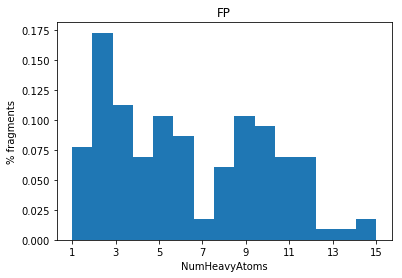

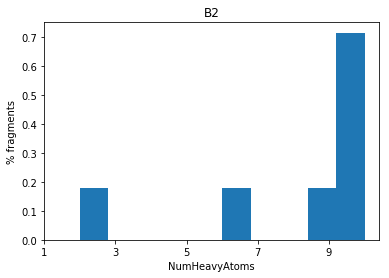

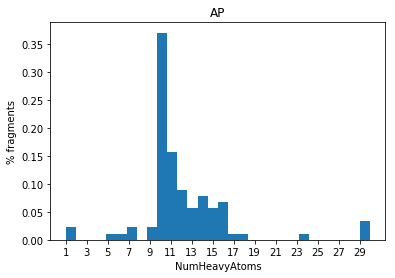

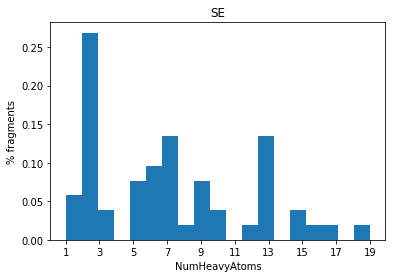

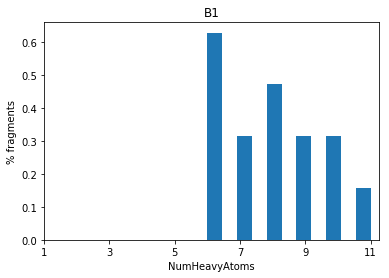

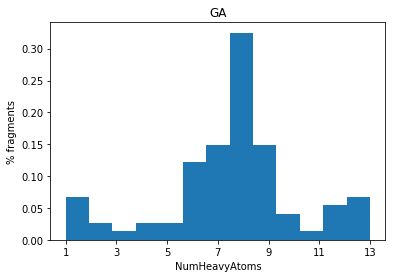

In [3]:
for i, folder in enumerate(folders):
    
    allFragments = set()
    numAtoms = []
    files = glob.glob(folder+'/*.sdf')
    for file in files:
        fragments = Chem.SDMolSupplier(file)
        for fragment in fragments:
            allFragments.update([fragment])
            numAtoms.append(fragment.GetNumHeavyAtoms())
            tmp = AllChem.Compute2DCoords(fragment)
    
    img = Draw.MolsToGridImage(allFragments,molsPerRow=6,subImgSize=(200,200))
    img.save(folder+'/all_fragments.png')

    plt.hist(numAtoms, density=True, bins=max(numAtoms))
    plt.title(subpockets[i])
    plt.xlabel('NumHeavyAtoms')
    plt.xticks(np.arange(1, max(numAtoms)+1, 2))
    plt.ylabel('% fragments')
    plt.savefig(folder+'/NumHeavyAtoms_21.03.png')
    plt.show()
     